<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/02_Preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data Manipulation

## 01. Getting Started

In [1]:
import torch

x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [2]:
x.shape


torch.Size([12])

In [3]:
x.numel()

12

In [4]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [5]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [6]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [7]:
torch.randn(3, 4)

tensor([[ 0.1447,  0.9031, -0.8558,  0.9168],
        [-0.0470, -0.1354,  0.3586,  0.3580],
        [-0.2279, -0.4127,  1.8819,  0.8244]])

In [8]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## 02. Operations

In [9]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])

x + y, x -y, x * y, x / y, x**y 

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [10]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [11]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

torch.cat((X,Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [12]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [13]:
X.sum()

tensor(66.)

## 03. Broadcasting Mechanism

In [14]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))

a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

In [15]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## 04. Indexing & Slicing

In [16]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]), tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [17]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [17]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## 05. Saving Memory

In [18]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [19]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))

Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140128670973776
id(Z): 140128670973776


In [20]:
before = id(X)
X +=Y
id(X) == before

True

## 06. Conversion to other Python Objects

In [21]:
A = X.numpy()
B = torch.tensor(A)

type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [22]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

#### Data Prepreocessing

## 01. Reading the Dataset

In [23]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')

with open(data_file, 'w') as f:
  f.write('NumRooms,Alley,Price\n')
  f.write('NA,Pave,127500\n')
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [24]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


## 02. Handling Missing Data

In [25]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:,2]

inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [26]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


## 03. Conversion to the Tensor Format

In [27]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X,y 

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

#### Linear Algebra

## 01. Scalars

In [28]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

## 02. Vectors

In [29]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [30]:
x[3]

tensor(3)

In [31]:
len(x)

4

In [32]:
x.shape

torch.Size([4])

## 03. Matrices

In [33]:
A = torch.arange(20).reshape(5, 4)
A 

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [34]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [35]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [36]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

## 04. Tensors

In [37]:
X = torch.arange(24).reshape(2, 3, 4)

## 05. Basic Properties of Tensor Arithmetic

In [38]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [39]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [40]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

## 06. Reduction

In [41]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [42]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [43]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [44]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [45]:
A.sum(axis=[0, 1])

tensor(190.)

In [46]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [47]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [48]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [49]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [50]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

## 07. Dot Products

In [51]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

## 08. Matrix-Vector Product

In [52]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

## 09. Matrix-Matrix Multiplication

In [53]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

## 10. Norms

In [54]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [55]:
torch.abs(u).sum()

tensor(7.)

In [56]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

#### Calculus

## 01. Derivatives and Differentiation

In [57]:
pip install -U d2l;

In [58]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):
  return 3 * x ** 2 - 4 * x

In [59]:
def numerical_lim(f, x, h):
  return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
  print(f'h={h:.5f}, numerical limit = {numerical_lim(f, 1, h):.5f}')
  h *=0.1

h=0.10000, numerical limit = 2.30000
h=0.01000, numerical limit = 2.03000
h=0.00100, numerical limit = 2.00300
h=0.00010, numerical limit = 2.00030
h=0.00001, numerical limit = 2.00003


In [65]:
def use_svg_display():
  display.set_matplotlib_formats('svg')

In [66]:
def set_figsize(figsize=(3.5, 2.5)):
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

In [67]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
  axes.grid()

In [68]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
  
  if legend is None:
    legend = []

  set_figsize(figsize)
  axes = axes if axes else d2l.plt.gca()

  def has_one_axis(X):
    return(hasattr(X, 'ndim') and X.ndim==1 or 
           isinstance(X, list) and not hasattr(X[0], "__len__"))
    
  if has_one_axis(X):
    X = [X]
  if Y is None:
    X, Y = [[]] * len(X), Y
  elif has_one_axis(Y):
    Y = [Y]
  if len(X) != len(Y):
    X = X * len(Y)
  axes.cla()
  for x, y, fmt in zip(X, Y, fmts):
    if len(X):
      axes.plot(x, y, fmt)
    else:
      axes.plot(y, fmt)
      
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

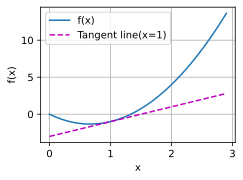

In [69]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line(x=1)'])

In [90]:
yy = [f(x), 2 * x - 3]
isinstance(yy, list), hasattr(yy[0], "__len__"), yy[0]

(True,
 True,
 array([ 0.  , -0.37, -0.68, -0.93, -1.12, -1.25, -1.32, -1.33, -1.28,
        -1.17, -1.  , -0.77, -0.48, -0.13,  0.28,  0.75,  1.28,  1.87,
         2.52,  3.23,  4.  ,  4.83,  5.72,  6.67,  7.68,  8.75,  9.88,
        11.07, 12.32, 13.63]))